In [116]:
import pandas as pd
import time

test = pd.read_csv("Corona_NLP_test.csv")
train = pd.read_csv("Corona_NLP_train.csv",encoding='latin1')

In [9]:
test.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [10]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [11]:
print("Shape of testing data:", test.shape, "\nShape of training data:" ,train.shape)

Shape of testing data: (3798, 6) 
Shape of training data: (41157, 6)


In [117]:
X_test = test['OriginalTweet']
X_train = train['OriginalTweet']
y_test = test['Sentiment']
y_train = train['Sentiment']

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#nltk.download('stopwords')
all_stopwords = stopwords.words('english')
remove_stopwords_list = ["not", "s", "t", "don", "don't", "d", "ll", "m", "o", "re", "ve", "y", "ain"]
stopwords = [i for i in all_stopwords if i not in remove_stopwords_list]
stopwords

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

In [185]:
import re

corpus_train = []
corpus_test = []
num_caps_train = []
num_caps_test = []


for eachreview in X_test:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#',' ', tw3) #remove tags but keeps words
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    tw9 = re.sub('\s+', ' ', tw8) #removes double spaces
    r = re.sub('[^a-zA-Z]', ' ', tw9)
    r = r.split()
    
    counter = 0
    for word in r:
        if word.isupper():
            counter += 1
    num_caps_test.append(counter)
    
    r = ' '.join(r)
    r = r.lower()
    r = r.split()
    
    #remove stopwords
    r = [lemmatize(word) for word in r if word not in stopwords if len(word) >= 3]
    r = ' '.join(r)
    corpus_test.append(r)
    
    
for eachreview in X_train:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#',' ', tw3) #remove tags but keeps words
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    tw9 = re.sub('\s+', ' ', tw8) #removes double spaces
    r = re.sub('[^a-zA-Z]', ' ', tw9)
    r = r.split()
    
    counter = 0
    for word in r:
        if word.isupper():
            counter += 1
    num_caps_test.append(counter)
    
    r = ' '.join(r)
    r = r.lower()
    r = r.split()
    
    #remove stopwords
    r = [lemmatize(word) for word in r if word not in stopwords if len(word) >= 3]
    r = ' '.join(r)
    corpus_train.append(r)


['',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shop account poss adequate supply regular meds not order',
 'coronavirus australia woolworths give elderly disable dedicate shop hours amid covid outbreak',
 'food stock not one empty please don panic enough food everyone not take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral',
 'ready supermarket covid outbreak not paranoid food stock litteraly empty coronavirus serious thing please don panic cause shortage coronavirusfrance restezchezvous stayathome confinement',
 'news region first confirm covid case come sullivan county last week people flock area store purchase clean supply hand sanitizer food toilet paper goods report',
 'cashier grocery store share insights covid prove credibility comment civics class know talk',
 'supermarket today buy toilet paper rebel toiletpapercrisis covid',
 '

In [15]:
X_train[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [16]:
corpus_train[10]

'month crowd supermarkets restaurants however reduce hours close malls mean everyone use entrance dependent single supermarket manila lockdown covid philippines'

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vecs = CountVectorizer(max_features=10000)


new_X_train = vecs.fit_transform(corpus_train)
new_X_test = vecs.transform(corpus_test)

m_train = new_X_train.todense()
m_test = new_X_test.todense()

In [18]:
print(new_X_test.shape)
print(new_X_train.shape)

(3798, 10000)
(41157, 10000)


In [19]:
print("The length of our new matrix is:", len(vecs.get_feature_names()))

The length of our new matrix is: 10000


"Original" Model

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(m_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.24602355
Validation score: 0.616618
Iteration 2, loss = 0.80214338
Validation score: 0.652575
Iteration 3, loss = 0.61629388
Validation score: 0.655005
Iteration 4, loss = 0.49593299
Validation score: 0.649417
Iteration 5, loss = 0.40275849
Validation score: 0.643343
Iteration 6, loss = 0.32757479
Validation score: 0.637755
Iteration 7, loss = 0.26546261
Validation score: 0.635811
Iteration 8, loss = 0.21455068
Validation score: 0.632896
Iteration 9, loss = 0.17358718
Validation score: 0.623178
Iteration 10, loss = 0.13998163
Validation score: 0.627065
Iteration 11, loss = 0.11319577
Validation score: 0.624393
Iteration 12, loss = 0.09315193
Validation score: 0.619048
Iteration 13, loss = 0.07678459
Validation score: 0.621720
Iteration 14, loss = 0.06414042
Validation score: 0.615160
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 78.36541891098022 to run


In [21]:
mlp_model.hidden_layer_sizes

(100,)

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = mlp_model.predict(m_test)
cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.636650868878357
                    precision    recall  f1-score   support

Extremely Negative       0.68      0.62      0.65       592
Extremely Positive       0.78      0.63      0.69       599
          Negative       0.58      0.60      0.59      1041
           Neutral       0.70      0.69      0.69       619
          Positive       0.58      0.66      0.62       947

          accuracy                           0.64      3798
         macro avg       0.66      0.64      0.65      3798
      weighted avg       0.64      0.64      0.64      3798



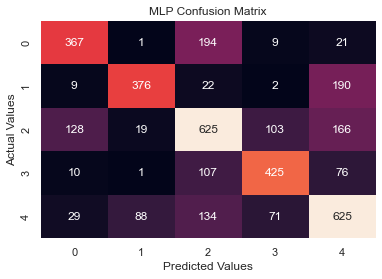

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)

sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [24]:
print(X_test[12], y_test[12])
print(corpus_test[12], y_pred[12])





https://t.co/aYQtLLGW1m Extremely Negative
panic food buy germany due coronavirus begin organic leave behind hamsterkauf panic buy call hamster purchase hamsterk ufe german take way hamsters stuff cheek food Extremely Negative


In [25]:
mp={'Extremely Negative':-1, 'Negative':-1, 'Neutral':0,
                'Positive':1, 'Extremely Positive':1}

y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [26]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(m_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 0.74175346
Validation score: 0.795190
Iteration 2, loss = 0.44678997
Validation score: 0.810010
Iteration 3, loss = 0.33634548
Validation score: 0.810739
Iteration 4, loss = 0.26249475
Validation score: 0.812682
Iteration 5, loss = 0.20533153
Validation score: 0.808795
Iteration 6, loss = 0.15757186
Validation score: 0.805879
Iteration 7, loss = 0.12073969
Validation score: 0.799563
Iteration 8, loss = 0.09209829
Validation score: 0.795432
Iteration 9, loss = 0.06943350
Validation score: 0.799806
Iteration 10, loss = 0.05336570
Validation score: 0.798105
Iteration 11, loss = 0.04183419
Validation score: 0.794947
Iteration 12, loss = 0.03344940
Validation score: 0.792517
Iteration 13, loss = 0.02706853
Validation score: 0.789845
Iteration 14, loss = 0.02287101
Validation score: 0.791059
Iteration 15, loss = 0.01942969
Validation score: 0.788873
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 83.922353982925

In [27]:
y_pred2 = mlp_model2.predict(m_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.8117430226434966
              precision    recall  f1-score   support

          -1       0.83      0.82      0.82      1633
           0       0.73      0.71      0.72       619
           1       0.82      0.84      0.83      1546

    accuracy                           0.81      3798
   macro avg       0.80      0.79      0.79      3798
weighted avg       0.81      0.81      0.81      3798



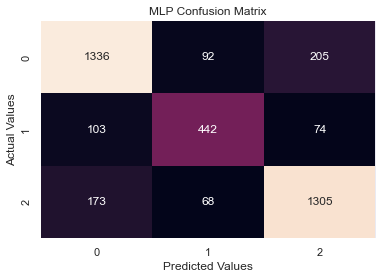

In [28]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

TfidfVectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vecs = TfidfVectorizer()


new_X_train = vecs.fit_transform(corpus_train)
new_X_test = vecs.transform(corpus_test)

m_train = new_X_train.todense()
m_test = new_X_test.todense()

In [30]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model = mlp.fit(m_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.42386197
Validation score: 0.512148
Iteration 2, loss = 0.96020601
Validation score: 0.599125
Iteration 3, loss = 0.66775581
Validation score: 0.611030
Iteration 4, loss = 0.49534375
Validation score: 0.609572
Iteration 5, loss = 0.38729297
Validation score: 0.603741
Iteration 6, loss = 0.31325782
Validation score: 0.601069
Iteration 7, loss = 0.26071808
Validation score: 0.590865
Iteration 8, loss = 0.22076496
Validation score: 0.591837
Iteration 9, loss = 0.19009973
Validation score: 0.580418
Iteration 10, loss = 0.16512054
Validation score: 0.575559
Iteration 11, loss = 0.14523682
Validation score: 0.573858
Iteration 12, loss = 0.12792980
Validation score: 0.572643
Iteration 13, loss = 0.11343100
Validation score: 0.563654
Iteration 14, loss = 0.10107529
Validation score: 0.564626
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 261.53839802742004 to run


In [31]:
y_pred = mlp_model.predict(m_test)
cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.5755660874144286
                    precision    recall  f1-score   support

Extremely Negative       0.66      0.52      0.58       592
Extremely Positive       0.73      0.53      0.62       599
          Negative       0.53      0.56      0.54      1041
           Neutral       0.63      0.61      0.62       619
          Positive       0.51      0.63      0.56       947

          accuracy                           0.58      3798
         macro avg       0.61      0.57      0.58      3798
      weighted avg       0.59      0.58      0.58      3798



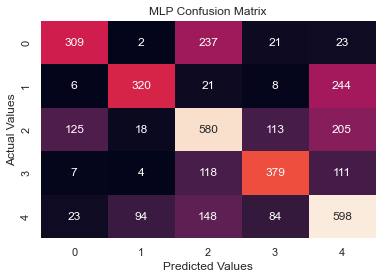

In [32]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [33]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [34]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(m_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 0.86721882
Validation score: 0.752187
Iteration 2, loss = 0.48793706
Validation score: 0.801992
Iteration 3, loss = 0.31897395
Validation score: 0.801992
Iteration 4, loss = 0.23614055
Validation score: 0.796647
Iteration 5, loss = 0.18579247
Validation score: 0.793246
Iteration 6, loss = 0.15094601
Validation score: 0.785957
Iteration 7, loss = 0.12493271
Validation score: 0.782556
Iteration 8, loss = 0.10552052
Validation score: 0.772838
Iteration 9, loss = 0.08964717
Validation score: 0.770165
Iteration 10, loss = 0.07641807
Validation score: 0.767007
Iteration 11, loss = 0.06566964
Validation score: 0.763605
Iteration 12, loss = 0.05699743
Validation score: 0.762148
Iteration 13, loss = 0.04903837
Validation score: 0.760690
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 245.5063281059265 to run


In [35]:
y_pred2 = mlp_model2.predict(m_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.7814639283833597
              precision    recall  f1-score   support

          -1       0.79      0.81      0.80      1633
           0       0.70      0.62      0.66       619
           1       0.80      0.81      0.81      1546

    accuracy                           0.78      3798
   macro avg       0.76      0.75      0.76      3798
weighted avg       0.78      0.78      0.78      3798



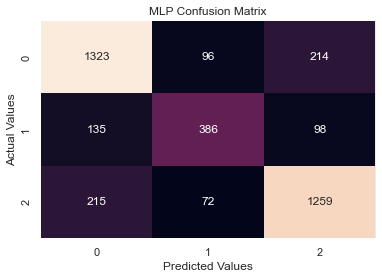

In [36]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

Keeping all caps

In [37]:
corpus_train = []
corpus_test = []
num_caps_train = []
num_caps_test = []


for eachreview in X_test:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#',' ', tw3) #remove tags but keeps words
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    tw9 = re.sub('\s+', ' ', tw8) #removes double spaces
    r = re.sub('[^a-zA-Z]', ' ', tw9)
    r = r.split()
    
    counter = 0
    for word in r:
        if word.isupper():
            counter += 1
    num_caps_test.append(counter)
    
    r = [w if w.isupper() else w.lower() for w in r ]
    
    r = ' '.join(r)
    #r = r.lower()
    r = r.split()
    
    #remove stopwords
    r = [lemmatize(word) for word in r if word not in stopwords if len(word) >= 3]
    r = ' '.join(r)
    corpus_test.append(r)
    
    
for eachreview in X_train:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#',' ', tw3) #remove tags but keeps words
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    tw9 = re.sub('\s+', ' ', tw8) #removes double spaces
    r = re.sub('[^a-zA-Z]', ' ', tw9)
    r = r.split()
    
    counter = 0
    for word in r:
        if word.isupper():
            counter += 1
    num_caps_train.append(counter)
    
    r = [w if w.isupper() else w.lower() for w in r ]
    
    r = ' '.join(r)
    #r = r.lower()
    r = r.split()
    
    #remove stopwords
    r = [lemmatize(word) for word in r if word not in stopwords if len(word) >= 3]
    r = ' '.join(r)
    corpus_train.append(r)

In [38]:
vecs = CountVectorizer(max_features=10000)


new_X_train = vecs.fit_transform(corpus_train)
new_X_test = vecs.transform(corpus_test)

m_train = new_X_train.todense()
m_test = new_X_test.todense()

In [39]:
print(new_X_test.shape)
print(new_X_train.shape)

(3798, 10000)
(41157, 10000)


In [40]:
print("The length of our new matrix is:", len(vecs.get_feature_names()))

The length of our new matrix is: 10000


In [41]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(m_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.26390447
Validation score: 0.611516
Iteration 2, loss = 0.82067178
Validation score: 0.648931
Iteration 3, loss = 0.63171416
Validation score: 0.651361
Iteration 4, loss = 0.50833664
Validation score: 0.650146
Iteration 5, loss = 0.41265972
Validation score: 0.642614
Iteration 6, loss = 0.33349156
Validation score: 0.633382
Iteration 7, loss = 0.26841693
Validation score: 0.626822
Iteration 8, loss = 0.21543107
Validation score: 0.627794
Iteration 9, loss = 0.17384336
Validation score: 0.623421
Iteration 10, loss = 0.13981606
Validation score: 0.622449
Iteration 11, loss = 0.11234455
Validation score: 0.616375
Iteration 12, loss = 0.09158140
Validation score: 0.615646
Iteration 13, loss = 0.07625013
Validation score: 0.613217
Iteration 14, loss = 0.06279528
Validation score: 0.613703
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 81.56967687606812 to run


In [42]:
mlp_model.hidden_layer_sizes

(100,)

In [43]:
y_pred = mlp_model.predict(m_test)
cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.6261190100052659
                    precision    recall  f1-score   support

Extremely Negative       0.71      0.59      0.64       592
Extremely Positive       0.79      0.57      0.66       599
          Negative       0.56      0.59      0.58      1041
           Neutral       0.71      0.69      0.70       619
          Positive       0.55      0.69      0.61       947

          accuracy                           0.63      3798
         macro avg       0.66      0.62      0.64      3798
      weighted avg       0.64      0.63      0.63      3798



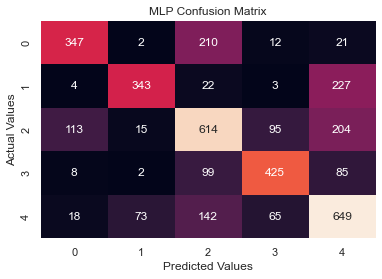

In [44]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [45]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [46]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(m_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 0.73109561
Validation score: 0.801992
Iteration 2, loss = 0.44383169
Validation score: 0.809524
Iteration 3, loss = 0.33854728
Validation score: 0.806851
Iteration 4, loss = 0.26817070
Validation score: 0.810253
Iteration 5, loss = 0.21223211
Validation score: 0.803936
Iteration 6, loss = 0.16775227
Validation score: 0.803207
Iteration 7, loss = 0.13058979
Validation score: 0.799563
Iteration 8, loss = 0.10050691
Validation score: 0.796647
Iteration 9, loss = 0.07840817
Validation score: 0.796404
Iteration 10, loss = 0.06120725
Validation score: 0.789359
Iteration 11, loss = 0.04910638
Validation score: 0.796161
Iteration 12, loss = 0.03877219
Validation score: 0.792274
Iteration 13, loss = 0.03179402
Validation score: 0.792760
Iteration 14, loss = 0.02633283
Validation score: 0.793246
Iteration 15, loss = 0.02240254
Validation score: 0.790330
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 87.040035009384

In [47]:
y_pred2 = mlp_model2.predict(m_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.8012111637704055
              precision    recall  f1-score   support

          -1       0.85      0.78      0.81      1633
           0       0.71      0.72      0.72       619
           1       0.79      0.86      0.82      1546

    accuracy                           0.80      3798
   macro avg       0.78      0.79      0.78      3798
weighted avg       0.80      0.80      0.80      3798



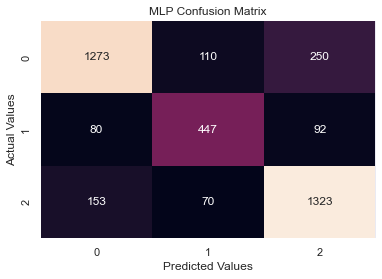

In [48]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

Number of all caps

In [49]:
import numpy as np 
num_caps_train = np.array(num_caps_train).reshape(-1, 1)
num_caps_test = np.array(num_caps_test).reshape(-1, 1)

In [50]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(num_caps_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.57765917
Validation score: 0.281584
Iteration 2, loss = 1.57301226
Validation score: 0.282070
Iteration 3, loss = 1.57274745
Validation score: 0.281341
Iteration 4, loss = 1.57310903
Validation score: 0.280126
Iteration 5, loss = 1.57311979
Validation score: 0.280612
Iteration 6, loss = 1.57297781
Validation score: 0.282313
Iteration 7, loss = 1.57315529
Validation score: 0.281098
Iteration 8, loss = 1.57269091
Validation score: 0.281584
Iteration 9, loss = 1.57295259
Validation score: 0.280369
Iteration 10, loss = 1.57286437
Validation score: 0.281341
Iteration 11, loss = 1.57291406
Validation score: 0.281098
Iteration 12, loss = 1.57325837
Validation score: 0.281584
Iteration 13, loss = 1.57275192
Validation score: 0.281341
Iteration 14, loss = 1.57265424
Validation score: 0.281584
Iteration 15, loss = 1.57259130
Validation score: 0.281584
Iteration 16, loss = 1.57311385
Validation score: 0.280612
Iteration 17, loss = 1.57289939
Validation score: 0.281827
Valida

In [51]:
mlp_model.hidden_layer_sizes

(100,)

In [52]:
y_pred = mlp_model.predict(num_caps_test)
cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.25013164823591366
                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.25      0.00      0.00       599
          Negative       0.20      0.00      0.01      1041
           Neutral       0.00      0.00      0.00       619
          Positive       0.25      1.00      0.40       947

          accuracy                           0.25      3798
         macro avg       0.14      0.20      0.08      3798
      weighted avg       0.16      0.25      0.10      3798



/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


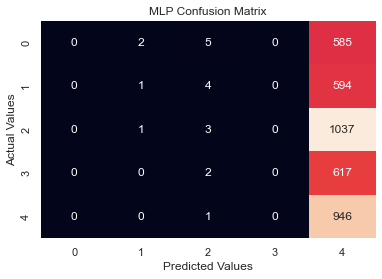

In [53]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [54]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [55]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(num_caps_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.04607513
Validation score: 0.436346
Iteration 2, loss = 1.04274336
Validation score: 0.424441
Iteration 3, loss = 1.04244504
Validation score: 0.437318
Iteration 4, loss = 1.04227330
Validation score: 0.436346
Iteration 5, loss = 1.04247668
Validation score: 0.437318
Iteration 6, loss = 1.04209156
Validation score: 0.437318
Iteration 7, loss = 1.04224274
Validation score: 0.434159
Iteration 8, loss = 1.04240300
Validation score: 0.437318
Iteration 9, loss = 1.04252687
Validation score: 0.437561
Iteration 10, loss = 1.04236778
Validation score: 0.438533
Iteration 11, loss = 1.04237396
Validation score: 0.437318
Iteration 12, loss = 1.04235198
Validation score: 0.437318
Iteration 13, loss = 1.04232325
Validation score: 0.436589
Iteration 14, loss = 1.04255376
Validation score: 0.437318
Iteration 15, loss = 1.04220168
Validation score: 0.432216
Iteration 16, loss = 1.04232440
Validation score: 0.436346
Iteration 17, loss = 1.04221824
Validation score: 0.437318
Iterat

In [56]:
y_pred2 = mlp_model2.predict(num_caps_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.408899420747762
              precision    recall  f1-score   support

          -1       0.65      0.01      0.01      1633
           0       0.00      0.00      0.00       619
           1       0.41      1.00      0.58      1546

    accuracy                           0.41      3798
   macro avg       0.35      0.33      0.20      3798
weighted avg       0.44      0.41      0.24      3798



/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


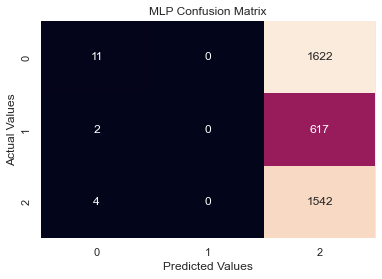

In [57]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

PCA

In [58]:
corpus_train = []
corpus_test = []
num_caps_train = []
num_caps_test = []


for eachreview in X_test:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#',' ', tw3) #remove tags but keeps words
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    tw9 = re.sub('\s+', ' ', tw8) #removes double spaces
    r = re.sub('[^a-zA-Z]', ' ', tw9)
    r = r.split()
    
    counter = 0
    for word in r:
        if word.isupper():
            counter += 1
    num_caps_test.append(counter)
    
    r = ' '.join(r)
    r = r.lower()
    r = r.split()
    
    #remove stopwords
    r = [lemmatize(word) for word in r if word not in stopwords if len(word) >= 3]
    r = ' '.join(r)
    corpus_test.append(r)
    
    
for eachreview in X_train:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#',' ', tw3) #remove tags but keeps words
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    tw9 = re.sub('\s+', ' ', tw8) #removes double spaces
    r = re.sub('[^a-zA-Z]', ' ', tw9)
    r = r.split()
    
    counter = 0
    for word in r:
        if word.isupper():
            counter += 1
    num_caps_test.append(counter)
    
    r = ' '.join(r)
    r = r.lower()
    r = r.split()
    
    #remove stopwords
    r = [lemmatize(word) for word in r if word not in stopwords if len(word) >= 3]
    r = ' '.join(r)
    corpus_train.append(r)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vecs = CountVectorizer(max_features=10000)


new_X_train = vecs.fit_transform(corpus_train)
new_X_test = vecs.transform(corpus_test)

m_train = new_X_train.todense()
m_test = new_X_test.todense()

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
principalComponents = pca.fit_transform(m_train)

In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.02444979, 0.04496071, 0.0625057 , 0.07825366, 0.09196735,
       0.1031758 , 0.11425026, 0.12517515, 0.13345049, 0.14133955,
       0.14858566, 0.15534247, 0.16205967, 0.16787659, 0.17320979,
       0.17839771, 0.18338544, 0.18814682, 0.19284017, 0.19736501,
       0.20171879, 0.2058929 , 0.21001603, 0.21407358, 0.21805061,
       0.22193176, 0.22570185, 0.22931068, 0.23287612, 0.23634788,
       0.23969647, 0.24298753, 0.24624465, 0.24943958, 0.25246031,
       0.25542405, 0.25833004, 0.26120643, 0.26394539, 0.26664184,
       0.2693122 , 0.27194427, 0.27451758, 0.27701665, 0.27950938,
       0.2819659 , 0.28434623, 0.28670654, 0.28901983, 0.29129777,
       0.29354403, 0.29571478, 0.29785731, 0.29998822, 0.30206731,
       0.30414405, 0.30619744, 0.30822186, 0.31023034, 0.3121936 ,
       0.31414874, 0.31609061, 0.31801648, 0.31992475, 0.32182684,
       0.32369359, 0.32554639, 0.32739192, 0.32921168, 0.33102386,
       0.33282333, 0.33461796, 0.3364108 , 0.33819111, 0.33995

In [102]:
pca = PCA(n_components = 22)
pca_train = pca.fit_transform(m_train)
pca_test = pca.transform(m_test)

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [119]:
X_train = pd.DataFrame(pca_train)
X_test = pd.DataFrame(pca_test)

In [107]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(X_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.51274871
Validation score: 0.336735
Iteration 2, loss = 1.47176992
Validation score: 0.336735
Iteration 3, loss = 1.46461271
Validation score: 0.342566
Iteration 4, loss = 1.45921303
Validation score: 0.339893
Iteration 5, loss = 1.45411860
Validation score: 0.340136
Iteration 6, loss = 1.44947205
Validation score: 0.341594
Iteration 7, loss = 1.44493397
Validation score: 0.345724
Iteration 8, loss = 1.44094564
Validation score: 0.349368
Iteration 9, loss = 1.43675208
Validation score: 0.346696
Iteration 10, loss = 1.43316815
Validation score: 0.353256
Iteration 11, loss = 1.43038137
Validation score: 0.355199
Iteration 12, loss = 1.42729385
Validation score: 0.356657
Iteration 13, loss = 1.42543362
Validation score: 0.356657
Iteration 14, loss = 1.42322317
Validation score: 0.354956
Iteration 15, loss = 1.42140958
Validation score: 0.356657
Iteration 16, loss = 1.41977368
Validation score: 0.362974
Iteration 17, loss = 1.41803154
Validation score: 0.362488
Iterat

In [131]:
y_pred = mlp_model.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.3451816745655608
                    precision    recall  f1-score   support

Extremely Negative       0.38      0.27      0.32       592
Extremely Positive       0.49      0.21      0.29       599
          Negative       0.33      0.33      0.33      1041
           Neutral       0.42      0.40      0.41       619
          Positive       0.29      0.46      0.36       947

          accuracy                           0.35      3798
         macro avg       0.38      0.33      0.34      3798
      weighted avg       0.37      0.35      0.34      3798



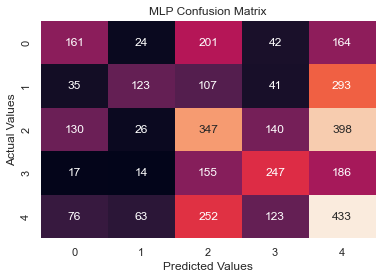

In [132]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [133]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [135]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(X_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 0.98299567
Validation score: 0.503887
Iteration 2, loss = 0.95420267
Validation score: 0.507046
Iteration 3, loss = 0.94791390
Validation score: 0.515549
Iteration 4, loss = 0.94330722
Validation score: 0.517250
Iteration 5, loss = 0.93894723
Validation score: 0.514334
Iteration 6, loss = 0.93484681
Validation score: 0.518707
Iteration 7, loss = 0.93149461
Validation score: 0.522838
Iteration 8, loss = 0.92813174
Validation score: 0.520894
Iteration 9, loss = 0.92539527
Validation score: 0.528669
Iteration 10, loss = 0.92285475
Validation score: 0.525510
Iteration 11, loss = 0.92094188
Validation score: 0.530612
Iteration 12, loss = 0.91895183
Validation score: 0.532313
Iteration 13, loss = 0.91710934
Validation score: 0.525024
Iteration 14, loss = 0.91550833
Validation score: 0.527697
Iteration 15, loss = 0.91431606
Validation score: 0.522595
Iteration 16, loss = 0.91317590
Validation score: 0.531098
Iteration 17, loss = 0.91191695
Validation score: 0.531098
Iterat

In [136]:
y_pred2 = mlp_model2.predict(X_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.5405476566614007
              precision    recall  f1-score   support

          -1       0.57      0.55      0.56      1633
           0       0.46      0.37      0.41       619
           1       0.54      0.60      0.57      1546

    accuracy                           0.54      3798
   macro avg       0.52      0.51      0.51      3798
weighted avg       0.54      0.54      0.54      3798



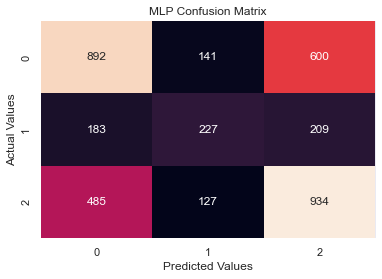

In [137]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [138]:
pca = PCA(n_components = 100)
pca_train = pca.fit_transform(m_train)
pca_test = pca.transform(m_test)

In [139]:
X_train = pd.DataFrame(pca_train)
X_test = pd.DataFrame(pca_test)

In [140]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(X_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.45899993
Validation score: 0.418610
Iteration 2, loss = 1.33200383
Validation score: 0.432459
Iteration 3, loss = 1.31089797
Validation score: 0.436103
Iteration 4, loss = 1.30034079
Validation score: 0.444121
Iteration 5, loss = 1.29214701
Validation score: 0.442420
Iteration 6, loss = 1.28391187
Validation score: 0.440233
Iteration 7, loss = 1.27679303
Validation score: 0.444121
Iteration 8, loss = 1.26952736
Validation score: 0.439990
Iteration 9, loss = 1.26207491
Validation score: 0.439504
Iteration 10, loss = 1.25521705
Validation score: 0.439018
Iteration 11, loss = 1.24824736
Validation score: 0.435860
Iteration 12, loss = 1.24161362
Validation score: 0.432459
Iteration 13, loss = 1.23523928
Validation score: 0.438533
Iteration 14, loss = 1.22842702
Validation score: 0.436589
Iteration 15, loss = 1.22310428
Validation score: 0.438290
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 3.8592362403869

In [141]:
y_pred = mlp_model.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.42022116903633494
                    precision    recall  f1-score   support

Extremely Negative       0.47      0.35      0.40       592
Extremely Positive       0.60      0.38      0.46       599
          Negative       0.39      0.39      0.39      1041
           Neutral       0.43      0.55      0.48       619
          Positive       0.37      0.44      0.40       947

          accuracy                           0.42      3798
         macro avg       0.45      0.42      0.43      3798
      weighted avg       0.44      0.42      0.42      3798



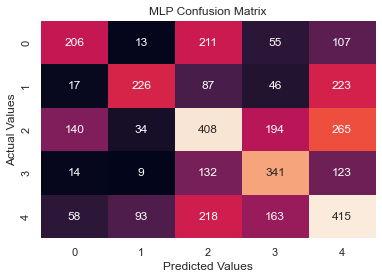

In [142]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [143]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [144]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(X_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 0.91860452
Validation score: 0.600340
Iteration 2, loss = 0.84173411
Validation score: 0.603499
Iteration 3, loss = 0.82971941
Validation score: 0.611273
Iteration 4, loss = 0.82132914
Validation score: 0.608115
Iteration 5, loss = 0.81352842
Validation score: 0.611030
Iteration 6, loss = 0.80671932
Validation score: 0.616861
Iteration 7, loss = 0.79969700
Validation score: 0.617347
Iteration 8, loss = 0.79304523
Validation score: 0.618076
Iteration 9, loss = 0.78622983
Validation score: 0.621477
Iteration 10, loss = 0.77996343
Validation score: 0.618562
Iteration 11, loss = 0.77369651
Validation score: 0.621477
Iteration 12, loss = 0.76755242
Validation score: 0.621477
Iteration 13, loss = 0.76221663
Validation score: 0.615160
Iteration 14, loss = 0.75718476
Validation score: 0.618076
Iteration 15, loss = 0.75233170
Validation score: 0.623421
Iteration 16, loss = 0.74751306
Validation score: 0.620505
Iteration 17, loss = 0.74292272
Validation score: 0.620991
Iterat

In [145]:
y_pred2 = mlp_model2.predict(X_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.6111111111111112
              precision    recall  f1-score   support

          -1       0.64      0.64      0.64      1633
           0       0.46      0.44      0.45       619
           1       0.64      0.65      0.65      1546

    accuracy                           0.61      3798
   macro avg       0.58      0.58      0.58      3798
weighted avg       0.61      0.61      0.61      3798



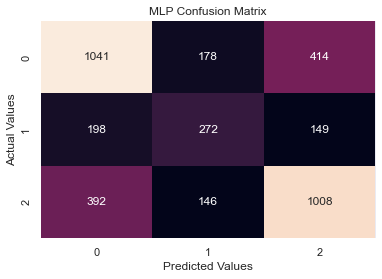

In [146]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [147]:
pca = PCA(n_components = 1000)
pca_train = pca.fit_transform(m_train)
pca_test = pca.transform(m_test)

In [148]:
X_train = pd.DataFrame(pca_train)
X_test = pd.DataFrame(pca_test)

In [149]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(X_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.35917672
Validation score: 0.551263
Iteration 2, loss = 1.02442617
Validation score: 0.596939
Iteration 3, loss = 0.93897666
Validation score: 0.601069
Iteration 4, loss = 0.89414134
Validation score: 0.605928
Iteration 5, loss = 0.85799627
Validation score: 0.602041
Iteration 6, loss = 0.82168520
Validation score: 0.600340
Iteration 7, loss = 0.78602912
Validation score: 0.601069
Iteration 8, loss = 0.74855534
Validation score: 0.604956
Iteration 9, loss = 0.70964071
Validation score: 0.594995
Iteration 10, loss = 0.67044892
Validation score: 0.600583
Iteration 11, loss = 0.63054295
Validation score: 0.597425
Iteration 12, loss = 0.59163896
Validation score: 0.592566
Iteration 13, loss = 0.55265994
Validation score: 0.590136
Iteration 14, loss = 0.51586006
Validation score: 0.592080
Iteration 15, loss = 0.48006357
Validation score: 0.583333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 13.600637912750

In [150]:
y_pred = mlp_model.predict(X_test)

cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.556872037914692
                    precision    recall  f1-score   support

Extremely Negative       0.59      0.52      0.55       592
Extremely Positive       0.71      0.54      0.61       599
          Negative       0.50      0.48      0.49      1041
           Neutral       0.61      0.67      0.64       619
          Positive       0.50      0.60      0.54       947

          accuracy                           0.56      3798
         macro avg       0.58      0.56      0.57      3798
      weighted avg       0.57      0.56      0.56      3798



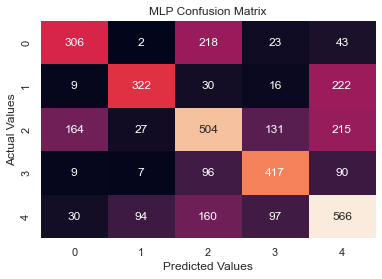

In [151]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [152]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [153]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(X_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 0.81808829
Validation score: 0.751701
Iteration 2, loss = 0.60392246
Validation score: 0.768707
Iteration 3, loss = 0.55209002
Validation score: 0.775267
Iteration 4, loss = 0.51902422
Validation score: 0.777211
Iteration 5, loss = 0.48777751
Validation score: 0.778183
Iteration 6, loss = 0.45632638
Validation score: 0.777211
Iteration 7, loss = 0.42463478
Validation score: 0.773081
Iteration 8, loss = 0.39190949
Validation score: 0.770651
Iteration 9, loss = 0.35892258
Validation score: 0.773324
Iteration 10, loss = 0.32711918
Validation score: 0.773810
Iteration 11, loss = 0.29501586
Validation score: 0.769922
Iteration 12, loss = 0.26532106
Validation score: 0.773567
Iteration 13, loss = 0.23740613
Validation score: 0.768950
Iteration 14, loss = 0.21231412
Validation score: 0.768707
Iteration 15, loss = 0.18868850
Validation score: 0.763605
Iteration 16, loss = 0.16787799
Validation score: 0.767736
Validation score did not improve more than tol=0.000100 for 10 co

In [154]:
y_pred2 = mlp_model2.predict(X_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.7490784623486045
              precision    recall  f1-score   support

          -1       0.77      0.76      0.77      1633
           0       0.64      0.67      0.65       619
           1       0.77      0.78      0.77      1546

    accuracy                           0.75      3798
   macro avg       0.73      0.73      0.73      3798
weighted avg       0.75      0.75      0.75      3798



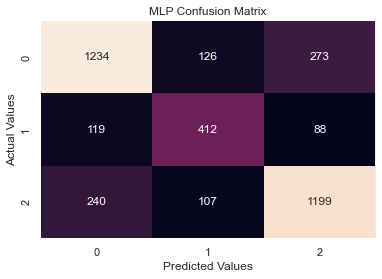

In [155]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

Hashtags only

In [172]:
X_test = test['OriginalTweet']
X_train = train['OriginalTweet']
y_test = test['Sentiment']
y_train = train['Sentiment']

In [188]:
corpus_train = []
corpus_test = []

for eachreview in X_test:
    r = re.findall("#(\w+)",eachreview) #remove tags but keeps words
    r = [word.lower() for word in r]
    r = ' '.join(r)
    corpus_test.append(r)
    
    
    
for eachreview in X_train:
    r = re.findall("#(\w+)",eachreview) #remove tags but keeps words
    r = [word.lower() for word in r]
    r = ' '.join(r)
    corpus_train.append(r)

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
vecs = CountVectorizer(max_features=10000)


new_X_train = vecs.fit_transform(corpus_train)
new_X_test = vecs.transform(corpus_test)

m_train = new_X_train.todense()
m_test = new_X_test.todense()

In [190]:
print(new_X_test.shape)
print(new_X_train.shape)

(3798, 10000)
(41157, 10000)


In [191]:
print("The length of our new matrix is:", len(vecs.get_feature_names()))

The length of our new matrix is: 10000


In [192]:
y_train.shape

(41157,)

In [193]:
mlp = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)

start_time = time.time()
mlp_model = mlp.fit(m_train,y_train)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.57331317
Validation score: 0.283771
Iteration 2, loss = 1.51748978
Validation score: 0.281584
Iteration 3, loss = 1.44214604
Validation score: 0.274052
Iteration 4, loss = 1.36656080
Validation score: 0.274295
Iteration 5, loss = 1.31014535
Validation score: 0.271380
Iteration 6, loss = 1.27251351
Validation score: 0.267250
Iteration 7, loss = 1.24782458
Validation score: 0.267736
Iteration 8, loss = 1.22977410
Validation score: 0.264820
Iteration 9, loss = 1.21692967
Validation score: 0.263848
Iteration 10, loss = 1.20625159
Validation score: 0.262634
Iteration 11, loss = 1.19711166
Validation score: 0.262391
Iteration 12, loss = 1.18951106
Validation score: 0.264820
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 72.92003607749939 to run


In [194]:
y_pred = mlp_model.predict(m_test)
cm_mlp = confusion_matrix(y_test, y_pred)
print("MLP Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

MLP Accuracy Score: 0.2553975776724592
                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       592
Extremely Positive       0.00      0.00      0.00       599
          Negative       0.31      0.08      0.12      1041
           Neutral       0.31      0.04      0.06       619
          Positive       0.25      0.92      0.39       947

          accuracy                           0.26      3798
         macro avg       0.17      0.21      0.12      3798
      weighted avg       0.20      0.26      0.14      3798



/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morganford/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


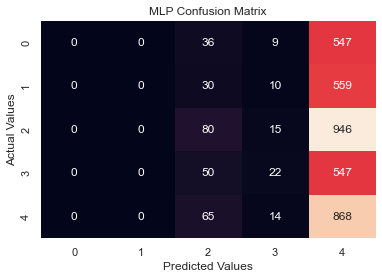

In [195]:
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [196]:
y_train2 = y_train.map(lambda x: mp[x])
y_test2 = y_test.map(lambda x: mp[x])

In [197]:
mlp2 = MLPClassifier(early_stopping = True, max_iter = 100, verbose = True)
start_time = time.time()
mlp_model2 = mlp2.fit(m_train,y_train2)
print("My program took", time.time() - start_time, "to run")

Iteration 1, loss = 1.04852442
Validation score: 0.459427
Iteration 2, loss = 0.99148783
Validation score: 0.458455
Iteration 3, loss = 0.93697671
Validation score: 0.461127
Iteration 4, loss = 0.89023473
Validation score: 0.461856
Iteration 5, loss = 0.85661026
Validation score: 0.460884
Iteration 6, loss = 0.83478494
Validation score: 0.459670
Iteration 7, loss = 0.81850390
Validation score: 0.453353
Iteration 8, loss = 0.80629393
Validation score: 0.455782
Iteration 9, loss = 0.79683377
Validation score: 0.456511
Iteration 10, loss = 0.78888748
Validation score: 0.451166
Iteration 11, loss = 0.78138863
Validation score: 0.453839
Iteration 12, loss = 0.77528603
Validation score: 0.456268
Iteration 13, loss = 0.76988525
Validation score: 0.455782
Iteration 14, loss = 0.76540010
Validation score: 0.451409
Iteration 15, loss = 0.76132206
Validation score: 0.450923
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
My program took 90.485775232315

In [198]:
y_pred2 = mlp_model2.predict(m_test)
cm_mlp2 = confusion_matrix(y_test2, y_pred2)
print("MLP Accuracy Score:", accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))

MLP Accuracy Score: 0.4133754607688257
              precision    recall  f1-score   support

          -1       0.45      0.19      0.27      1633
           0       0.24      0.05      0.08       619
           1       0.41      0.80      0.54      1546

    accuracy                           0.41      3798
   macro avg       0.37      0.35      0.30      3798
weighted avg       0.40      0.41      0.35      3798



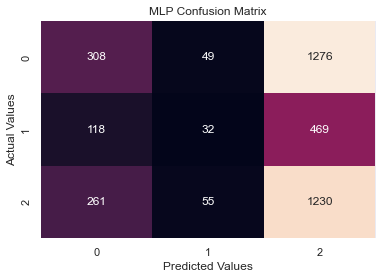

In [199]:
sns.heatmap(cm_mlp2, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()